In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cd /content/drive/My\ Drive/Data\ Science/Project

In [0]:
import numpy as np 
import pandas as pd
#Read csv file to create a pandas dataFrame
df = pd.read_csv("house_dataset.csv");
#Checking Data types of features
df.info()

In [0]:
#Replacing all 'Belirtilmemiş' values with Numpy NaN
df = df.replace("Belirtilmemiş", np.NaN)

In [0]:
#Dropping id column
df.drop("id", axis= 1, inplace = True)

In [0]:
#Printing unique values for isinma column
df["isinma"].unique()

In [0]:
#Encoding isinma column
isinma = {"Kombi": 0, "Merkezi (Pay Ölçer)": 1, "Merkezi": 2, "Soba": 3,
          "Klima": 4, "Kat Kaloriferi": 5, "Isıtma Yok": 6, "Jeotermal Isıtma": 7}
df["isinma"] = df["isinma"].replace(isinma)
df["isinma"].value_counts()

In [0]:
#Printing unique values for esyali column
df["esyali"].unique()

In [0]:
#Encoding esyali column
esyali = {"Eşyalı Değil": 0, "Eşyalı": 1}
df["esyali"] = df["esyali"].replace(esyali)
df["esyali"].value_counts()

In [0]:
#Printing unique values for kredi column
df["kredi"].unique()

In [0]:
#Encoding kredi column
kredi = {"Uygun":1 , "Uygun değil": 0 , "Bilinmiyor":np.NaN}
df["kredi"] = df["kredi"].replace(kredi)
df["kredi"].value_counts()

In [0]:
#Printing unique values for tapu column
df["tapu"].unique()

In [0]:
#Encoding tapu column
tapu = {"Arsa": 1 , "Kat İrtifakı": 2 , "Kat Mülkiyeti": 3}
df["tapu"] = df["tapu"].replace(tapu)
df["tapu"].value_counts()

In [0]:
#Creating a new dataframe from odasalon column with two seperate columns which are oda and salon 
df_odaSalon= pd.DataFrame(df.odasalon.str.split('+',1).tolist(),
                                 columns = ['oda','salon'])
#Storing these columns as Numpy int64
df_odaSalon['oda'] = df_odaSalon['oda'].astype(np.int64)
df_odaSalon['salon'] = df_odaSalon['salon'].astype(np.int64)
df_odaSalon.info()

In [0]:
#Dropping odasalon column from df
df.drop("odasalon", axis= 1, inplace = True)
#Joining df_odaSalon to df
df = df.join(df_odaSalon)

In [0]:
#Since yasi column has values like '12 yaşında'. 
#We need to split yasi column according to space character to get the first element as Numpy int64
df['yasi'] = df['yasi'].str.split(' ').str[0]
df["yasi"] = df["yasi"].replace("Sıfır", 0)
df['yasi'] = df['yasi'].astype(np.int64)
df["yasi"].value_counts()

In [0]:
#Since fiyat column has values like '450.000 TL'. 
#We need to split fiyat column according to space character to get the first element then format to remove unneccesary '.' and ',' characters
#Then store these values as Numpy int64
df['fiyat'] = df['fiyat'].str.split(' ').str[0]
df['fiyat'] = (df['fiyat'].str.replace('.', ''))
df['fiyat'] = (df['fiyat'].str.replace(',', ''))
df['fiyat'] = df['fiyat'].astype(np.int64)
df["fiyat"].value_counts()

In [0]:
#Checking if there is any null data
df.isnull().sum()

In [0]:
#Dropping rows which has NaN value in it
df = df.dropna()

In [0]:
#Since net column has values like '85.00'. 
#We need to split net column according to '.' character to get the first element as Numpy int64
df['net'] = df['net'].str.split('.').str[0]
df['net'] = df['net'].astype(np.int64)

In [0]:
#To encode ilce values create a new dataframe which is encode_ilce and fill it with mean value of fiyat grouped by ilce
encode_ilce = df.groupby('ilce', as_index=False)['fiyat'].mean().sort_values('fiyat')
#Then reset indexes to set the cheapest ilce's index to 0. 
encode_ilce = encode_ilce.reset_index(drop=True)
#Reverse dictionary's key and values to use it in encoding
rev_dict = {v: k for k, v in encode_ilce['ilce'].to_dict().items()}
#Encode ilce values with the dictionary
df["ilce"] = df["ilce"].replace(rev_dict)
df["ilce"].value_counts()
df['ilce'] = df['ilce'].astype(np.int64)

In [0]:
#To encode kati values create a new dataframe which is encode_kat and fill it with mean value of fiyat grouped by kat
encode_kat = df.groupby('kati', as_index=False)['fiyat'].mean().sort_values('fiyat')
#Then reset indexes to set the cheapest kat's index to 0. 
encode_kat = encode_kat.reset_index(drop=True)
#Reverse dictionary's key and values to use it in encoding
rev_dict = {v: k for k, v in encode_kat['kati'].to_dict().items()}
#Encode kati values with the dictionary
df["kati"] = df["kati"].replace(rev_dict)
df["kati"].value_counts()
df['kati'] = df['kati'].astype(np.int64)

In [0]:
df.info()

In [0]:
df.to_csv('test.csv', index=False)

In [0]:
cd/content/drive/My Drive/PythonData/test.csv

In [0]:
df = pd.read_csv("test.csv");

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
encode_kat.set_index('kati').plot(figsize = (25, 10), kind = 'bar', color = 'red')
plt.savefig('KatFiyat.png')

In [0]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.savefig('heatmap.png')

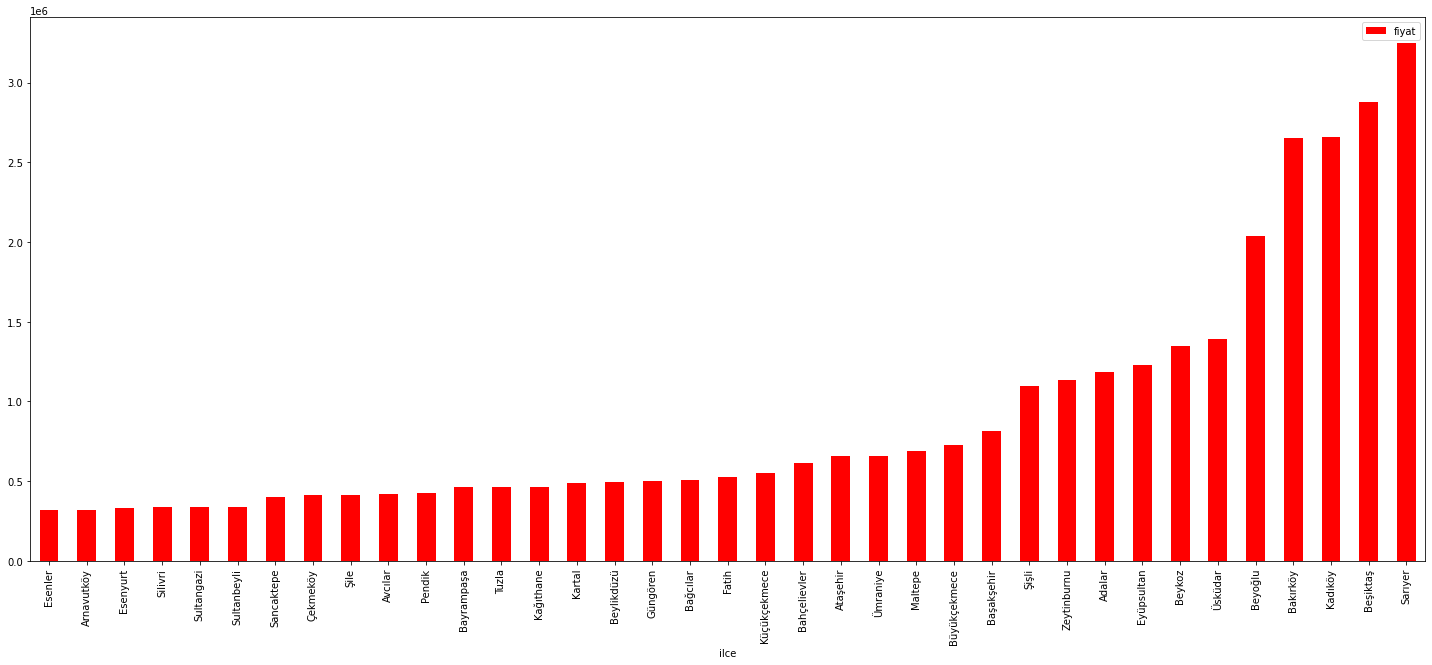

In [0]:
encode_ilce.set_index('ilce').plot(figsize = (25, 10), kind = 'bar', color = 'red')
plt.savefig('İlceFiyat.png')

In [0]:
df.groupby('esyali').fiyat.mean().plot( kind = 'bar', color = 'red')
plt.savefig('esyaFiyat.png')

In [0]:
df.groupby('ilce').net.mean().plot(figsize = (25, 10), kind = 'bar', color = 'red')
plt.savefig('İlceNet.png')

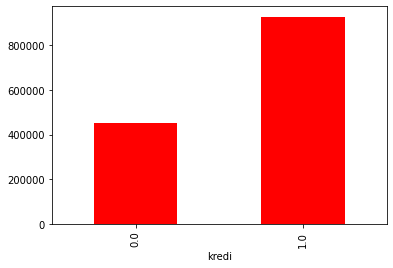

In [0]:
df.groupby('kredi').fiyat.mean().plot(kind = 'bar', color = 'red')
plt.savefig('krediFiyat.png')

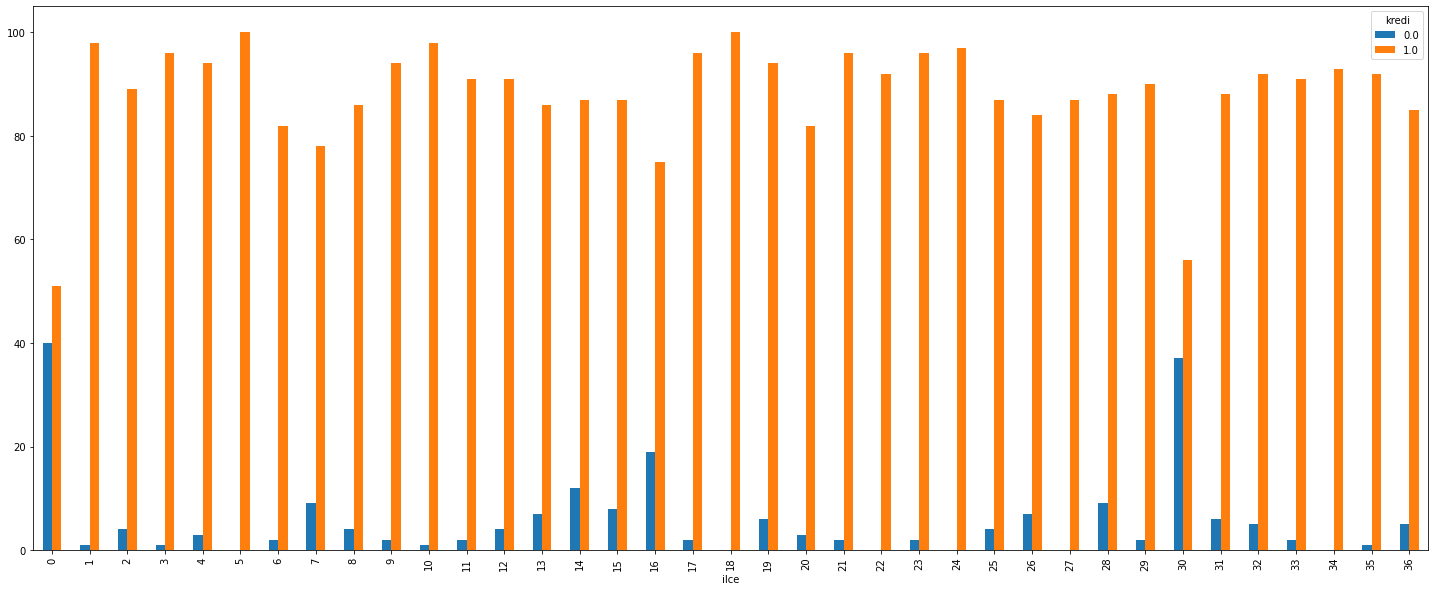

In [0]:
df.groupby(['kredi']).ilce.value_counts().unstack('kredi').plot.bar(figsize = (25, 10))
plt.savefig('krediİlce.png')

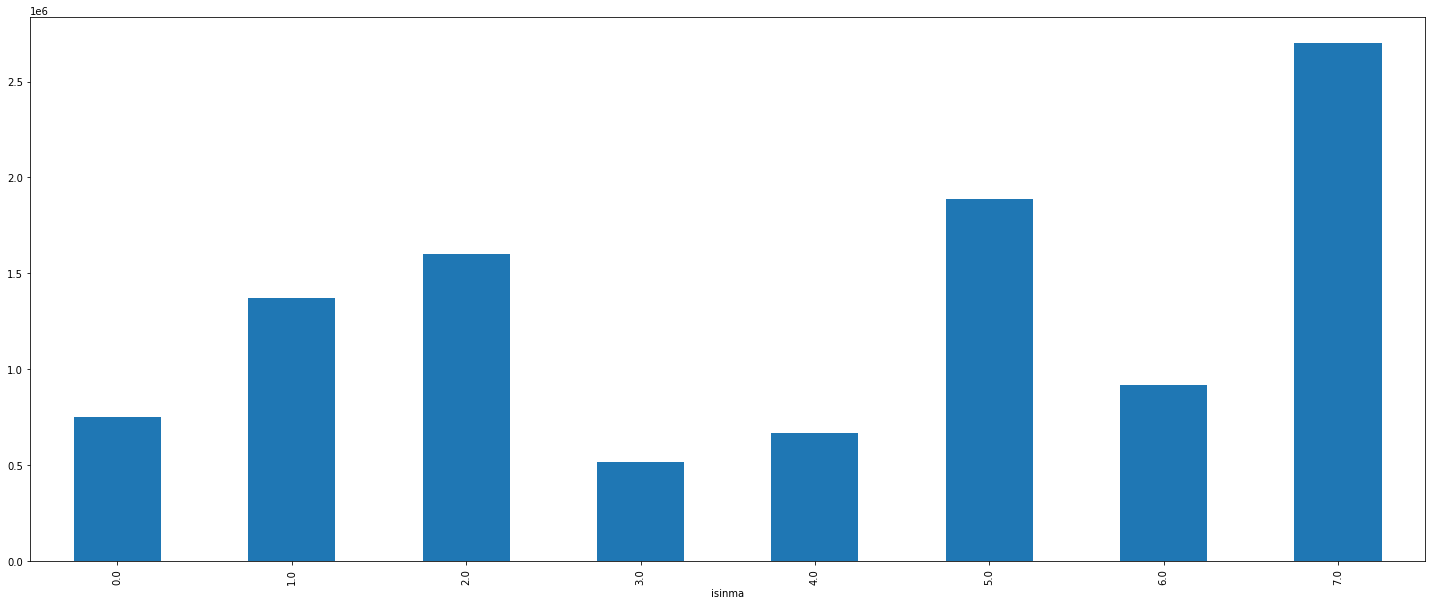

In [0]:
df.groupby(['isinma']).fiyat.mean().plot.bar(figsize = (25, 10))
plt.savefig('isinmaFiyat.png')

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [0]:
df_multiple = df[['ilce','kati','net','brut','oda','banyo', 'tapu', 'salon', 'esyali', 'kredi','fiyat']];

x = df_multiple.iloc[:, : -1].values
y = df_multiple.iloc[: , 10].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
msqe = sum((y_pred - y_test) * (y_pred - y_test)) / y_test.shape[0]
rmse = np.sqrt(msqe)
print(rmse)

950933.9982000726


In [0]:
print(r2_score(y_test,y_pred))

0.5518557810474856


In [0]:
import statsmodels.api as sm 
import sklearn.metrics as metric
# Using backward elimination to build the optimal model
# SL = 0.05 and eliminating those features which have p > SL
x_opt = x[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
x = np.append(arr = np.ones((3481,1)).astype(int), values = x, axis = 1)
ols = sm.OLS(y, x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              579.6
Date:                Wed, 27 May 2020   Prob (F-statistic):                        0.00
Time:                        19:57:26   Log-Likelihood:                         -53139.
No. Observations:                3481   AIC:                                  1.063e+05
Df Residuals:                    3471   BIC:                                  1.064e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.503e+04   1730.921     20.235      0.000    3.16e+04    3.84e+04
x2         -6729.8079   2643.153     -2.546      0.011   -1.19e+04   -1547.516
x3          1002.4451   1453.615      0.690      0.490   -1847.581    3852.472
x4          1.685e+04   1337.769     12.593      0.000    1.42e+04    1.95e+04
x5         -4.895e+05   3.11e+04    -15.758      0.000    -5.5e+05   -4.29e+05
x6          1.925e+05   3.71e+04      5.195      0.000     1.2e+05    2.65e+05
x7         -2.061e+05   3.12e+04     -6.606      0.000   -2.67e+05   -1.45e+05
x8         -5.116e+04   1.14e+04     -4.503      0.000   -7.34e+04   -2.89e+04
x9          1.404e+04    1.1e+05      0.128      0.898   -2.02e+05     2.3e+05
x10        -3.606e+05   7.96e+04     -4.529      0.000   -5.17e+05   -2.05e+05
==============================================================================
Omnibus:                     3427.573   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           256362.912
Skew:                           4.638   Prob(JB):                         0.00
Kurtosis:                      44.006   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
sl = 0.05
numVars = len(x_opt[0])
for i in range(0, numVars):
    regressor_ols = sm.OLS(y, x_opt).fit()
    print("i:", i)
    print(regressor_ols.summary())
    maxVar = max(regressor_ols.pvalues).astype(float)
    if maxVar > sl:
        for j in range(0, numVars - i):
            if (regressor_ols.pvalues[j].astype(float) == maxVar):
                x_opt = np.delete(x_opt, j, 1)

i: 0
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              579.6
Date:                Wed, 27 May 2020   Prob (F-statistic):                        0.00
Time:                        19:57:31   Log-Likelihood:                         -53139.
No. Observations:                3481   AIC:                                  1.063e+05
Df Residuals:                    3471   BIC:                                  1.064e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [0]:
#Using Multiple Linear Regression with the Optimized Features

x_train, x_test, y_train, y_test = train_test_split(x_opt, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
msqe = sum((y_pred - y_test) * (y_pred - y_test)) / y_test.shape[0]
rmse = np.sqrt(msqe)
print(rmse)

950454.4650327943


In [0]:
print(r2_score(y_test,y_pred))

0.5523076438111696


In [0]:
#Random Forest Regression
sel_cols = ['ilce','kati','brut','oda','banyo', 'tapu', 'salon','fiyat']
df_randomForest = df[sel_cols]

x = df_randomForest.iloc[:, : -1].values
y = df_randomForest.iloc[: , 7].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#max depth versus error
md = 30;
md_errors = np.zeros(md)

from sklearn.ensemble import RandomForestRegressor
for i in range(1, md+1):
    regressor = RandomForestRegressor(n_estimators = 100, max_depth = i, random_state = 0)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    #finding error
    msqe = sum((y_pred - y_test) * (y_pred - y_test)) / y_test.shape[0]
    md_errors[i-1] = np.sqrt(msqe)


plt.scatter(range(1, md+1), md_errors, color = 'red')
plt.plot(range(1, md+1), md_errors, color = 'blue')
plt.xlabel('max depth')
plt.ylabel('rmse')
plt.show()

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, max_depth = 20, max_features = 0.5, min_samples_split = 5, random_state = 42)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
msqe = sum((y_pred - y_test) * (y_pred - y_test)) / y_test.shape[0]
rmse = np.sqrt(msqe)
print(rmse)

In [0]:
print(r2_score(y_test,y_pred))

In [0]:
regressor

In [0]:
from sklearn.model_selection import GridSearchCV
random_params = {'max_depth':[13,20,22], 'max_features':[0.5,1,2,4], 'n_estimators':[500,1000,2000, 2500]}
random_cv_model = GridSearchCV(regressor , random_params, cv=10, n_jobs=4, verbose =2).fit(x_train ,y_train)
random_cv_model.best_params_

In [0]:
#Optimized Random Forest Regression
final_random_model = RandomForestRegressor(max_depth =20,max_features=2,n_estimators=1000).fit(x_train, y_train)
y_pred =final_random_model.predict(x_test)
msqe = sum((y_pred - y_test) * (y_pred - y_test)) / y_test.shape[0]
rmse = np.sqrt(msqe)
print(rmse)

In [0]:
print(r2_score(y_test,y_pred))

In [0]:
#KNN Regression
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) 
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

#number of neighbors versus accuracy
accuracy = np.zeros(14)
j = 0

for i in range(1, 29, 2):
   knn = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2) 
   knn.fit(x_train, y_train)
   y_pred = knn.predict(x_test)
   #finding error
   accuracy[j] = sum(y_pred == y_test) / y_test.shape[0]
   j = j + 1


plt.scatter(range(1, 29, 2), accuracy, color = 'red')
plt.plot(range(1, 29, 2), accuracy, color = 'blue')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [0]:
knn = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2) 
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#finding error
accuracy = sum(y_pred == y_test) / y_test.shape[0]
print(accuracy)

In [0]:
print(r2_score(y_test,y_pred))